In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import itertools

# Read the performance metrics 
## From the metrics.perf file

```
cost training:interpolation 1000:1 20.42638202879111
cost discretization:interpolation 10:0 20.504031897615224
time training:interpolation 1000:1 0.292188
time discretization:interpolation 10:0 0.016527
```

In [2]:
def read_perf_metrics(filename):
    inf = open(filename, "r")
    data = {}
    for line in inf:
        line = line.split("\n")[0].split(" ")
        lid = line[1] + line[2]
        if line[0] == "cost":
            data[lid] = {}
            data[lid]["type"] = line[1]
            params = line[1].split(":")
            for p in range(len(params)):
                data[lid][params[p]] = int(line[2].split(":")[p])
            data[lid]["cost"] = float(line[3])
            data[lid]["param"] = line[2]
            data[lid]["time"] = -1
        elif line[0] == "time":
            data[lid]["time"] = float(line[3])
    inf.close()

    df = pd.DataFrame(columns=["type", "param", "training",
                               "interpolation", "discretization",
                               "checkpoint", "cost", "time"])
    for lid in data:
        df = df.append(data[lid], ignore_index=True)
    return df

# Function to plot the metrics for a given study

In [28]:
def plot_study(study):
    params = study.split(':')
    values = []
    for p in range(1, len(params)):
        unique_values = df[df.type==study][params[p]].unique()
        values.append([int(i) for i in unique_values if i == i])

    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(24,8))
    sns.set(font_scale=2)
    sns.set_style("white")

    for i in itertools.product(*values):
        df_print = df[df.type==study]
        label = ''
        for p in range(1, len(params)):
            df_print = df_print[df_print[params[p]] == i[p - 1]]
            label += " " + name[params[p]][i[p - 1]]
        sns.lineplot(x=params[0], y="cost", data=df_print,
                     label = label, ax=ax)
        sns.lineplot(x=params[0], y="time", data=df_print,
                     label = label, ax=ax2)
    

    ax.grid(True)
    ax2.grid(True)
    ax.set_ylabel("Cost")
    ax2.set_ylabel("Time")

    plt.savefig("%s.png" %("_".join([i for i in params])))
    plt.show()

# Plot each study

In [4]:
df = read_perf_metrics("metrics.perf")

In [5]:
name = {}
name["interpolation"] = ["No interpolation", "Polynomial interpolation"]
name["checkpoint"] = ["Never CR", "Always CR", "Adaptive CR"]

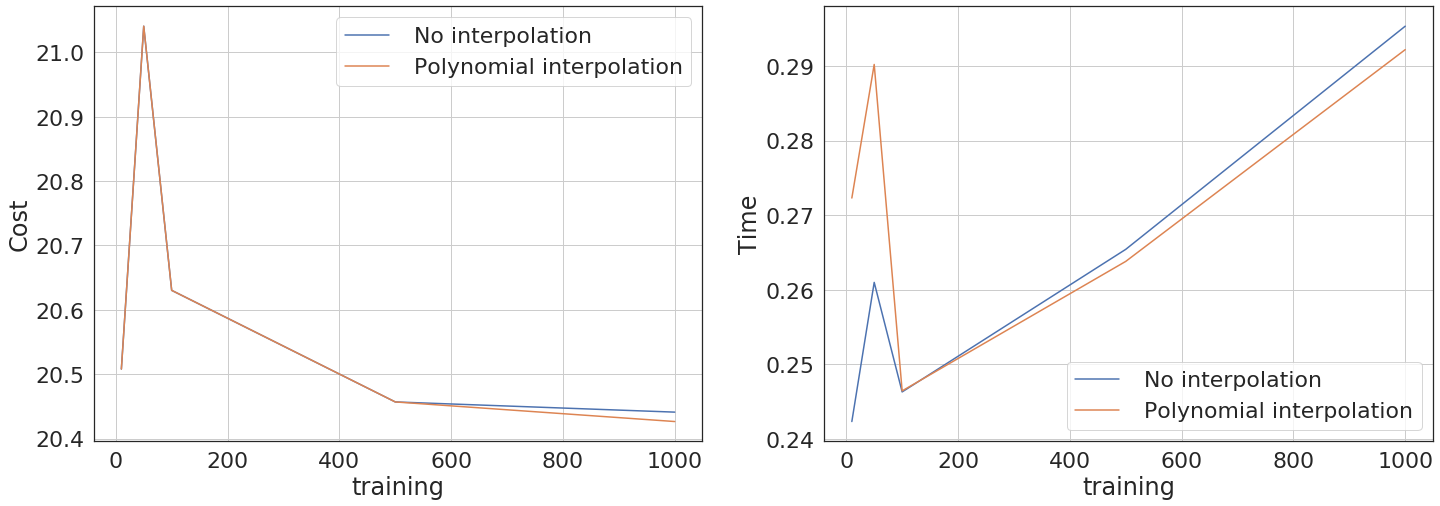

In [29]:
plot_study("training:interpolation")

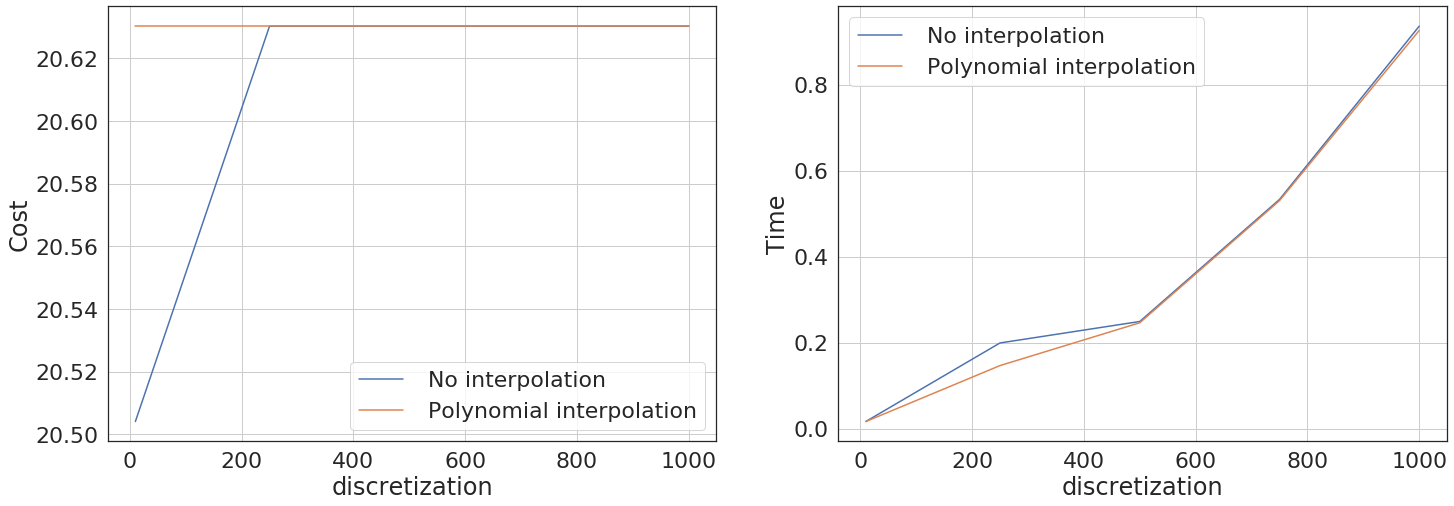

In [30]:
plot_study("discretization:interpolation")

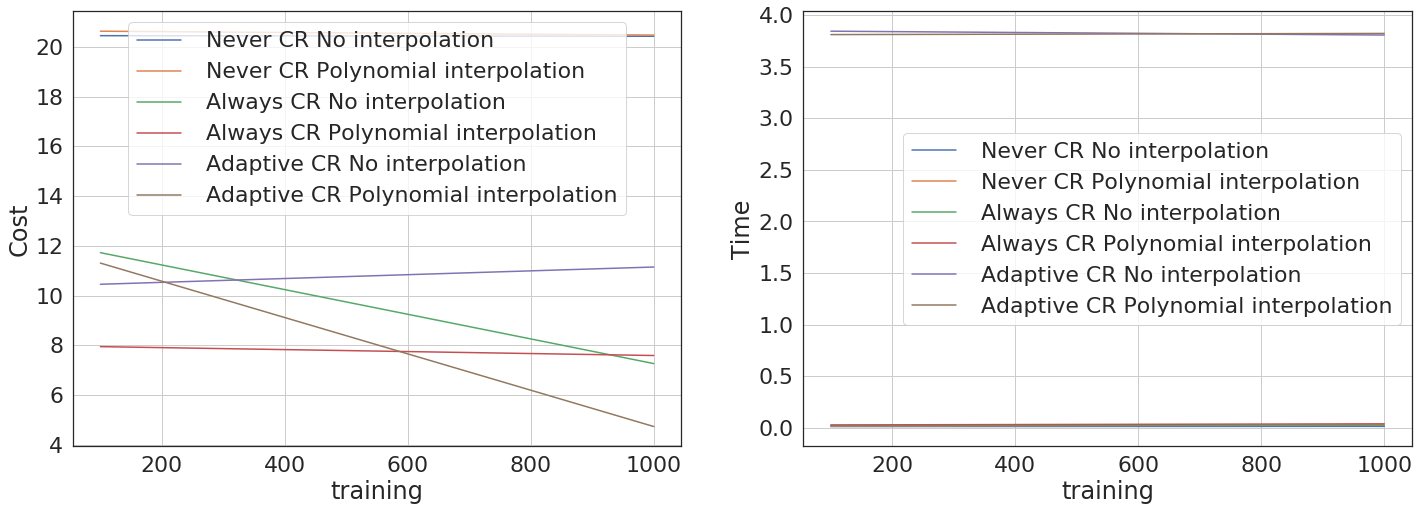

In [31]:
plot_study("training:checkpoint:interpolation")